Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 66s 1ms/step - loss: 0.3348 - acc: 0.9125 - val_loss: 0.0681 - val_acc: 0.9824
Epoch 2/10
50000/50000 [==============================] - 65s 1ms/step - loss: 0.0578 - acc: 0.9836 - val_loss: 0.0485 - val_acc: 0.9873
Epoch 3/10
50000/50000 [==============================] - 64s 1ms/step - loss: 0.0358 - acc: 0.9899 - val_loss: 0.0441 - val_acc: 0.9871
Epoch 4/10
50000/50000 [==============================] - 64s 1ms/step - loss: 0.0230 - acc: 0.9936 - val_loss: 0.0417 - val_acc: 0.9877
Epoch 5/10
50000/50000 [==============================] - 61s 1ms/step - loss: 0.0160 - acc: 0.9953 - val_loss: 0.0400 - val_acc: 0.9872
Epoch 6/10
50000/50000 [==============================] - 59s 1ms/step - loss: 0.0092 - acc: 0.9979 - val_loss: 0.0388 - val_acc: 0.9884
Epoch 7/10
50000/50000 [==============================] - 60s 1ms/step - loss: 0.0081 - acc: 0.9979 - val_loss: 0.0393 - val_acc

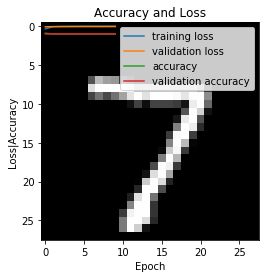

In [6]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]

# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# 5. Định nghĩa model
model = Sequential()

# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác suất.
model.add(Dense(10, activation='softmax'))

# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức
# dùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)

# 8. Vẽ đồ thị loss, accuracy của training set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_acc'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

# 10. Dự đoán ảnh
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))